# Детский сад - функционал NumPy

In [1]:
import torch

In [2]:
a = torch.tensor([1,2,3])
b = torch.tensor([1.2,3.6,2.4])
print(a)
print(b)

tensor([1, 2, 3])
tensor([1.2000, 3.6000, 2.4000])


In [3]:
c = a * 3
d = b ** 2
print(c)
print(d)

tensor([3, 6, 9])
tensor([ 1.4400, 12.9600,  5.7600])


In [4]:
e = a + b
print(e)

tensor([2.2000, 5.6000, 5.4000])


In [5]:
print(e.mean()) # только для тензоров с плавающей точкой ?
print(d.std())

tensor(4.4000)
tensor(5.8197)


In [6]:
error = (a - b) ** 2
print(error.mean())

tensor(0.9867)


In [7]:
a = torch.tensor([[0.4,1.8],[0.1,1.4]])
b = torch.tensor([[0.6,1.2],[0.8,1.6]])
print(a,end='\n\n')
print(b,end='\n\n')
print(a+b,end='\n\n')
print(a @ b)
print(a.mean(),a.mean(0),a.mean(1)) # среднее по всем, среднее по столбцам, среднее по строкам

tensor([[0.4000, 1.8000],
        [0.1000, 1.4000]])

tensor([[0.6000, 1.2000],
        [0.8000, 1.6000]])

tensor([[1.0000, 3.0000],
        [0.9000, 3.0000]])

tensor([[1.6800, 3.3600],
        [1.1800, 2.3600]])
tensor(0.9250) tensor([0.2500, 1.6000]) tensor([1.1000, 0.7500])


# Преимущество 1. Перенос расчетов на видеокарту (доделать)

In [8]:
a.device
# a = a.to("cuda")  попробовать на компе
# a.device

device(type='cpu')

# Преимущество 2. Автоматическое вычисление градиента

In [9]:
a = torch.tensor(2.5, requires_grad=True)
f = a ** 2
f.backward()
print(a.grad) # в a.grad записывается производная df/da в точке 2.5
# т.е должно быть 2 * a = 5

b = torch.tensor(1.0, requires_grad = True) # ! только float тензоры имеют requires_grad
g = a*b + 3*a + 2 * b
g.backward()
# dg/da = b + 3 = 4, dg/db = a + 2 = 4.5
print(a.grad, b.grad)

c = torch.tensor([3.0,4.5], requires_grad= True) # 

# h = 1 / c  <- RuntimeError: grad can be implicitly created only for scalar outputs
h = 1/c[0] + 1/c[1]
# dh/dc0 = -1/c0**2 = -1/9, dh/dc1 = -1/c1**2 = -1/4.5**2
h.backward()
print(h)
print(c.grad)

tensor(5.)
tensor(9.) tensor(4.5000)
tensor(0.5556, grad_fn=<AddBackward0>)
tensor([-0.1111, -0.0494])


In [10]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

history_x = []
history_y = []
history_z = []
history_f = []

x = torch.randn(2, requires_grad=True)
lr = 1e-1
for i in range(50):
    f = 0.5*(x[0] - 2) ** 2 + 0.3*(x[1]- 4) ** 2 + 6
    
    # Сохраняем историю
    history_x.append(x[0].item())
    history_y.append(x[1].item())
    history_z.append(x[0].item())  
    history_f.append(f.item())
    
    f.backward()
    with torch.no_grad(): # на 0 этапе мы не сможем выполнить
        x -= lr * x.grad
    x.grad = None # в torch значения не перезаписываются, а складываются



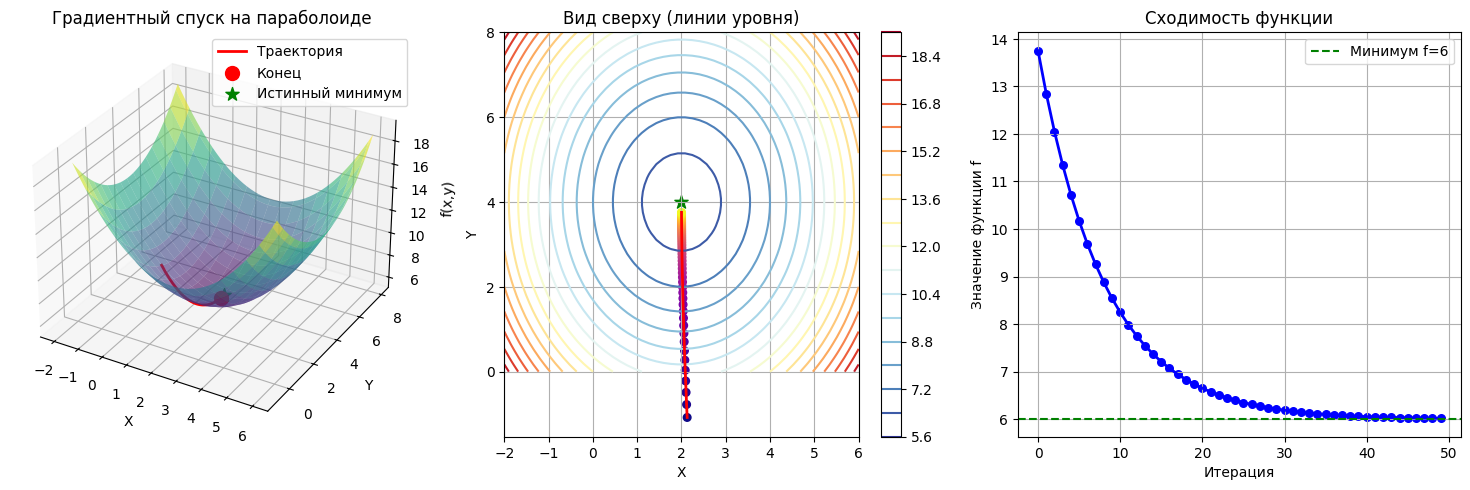

In [11]:
# Преобразуем историю в массивы
history_x = np.array(history_x)
history_y = np.array(history_y)
history_z = np.array(history_f)  # значение функции как z-координата
history_f = np.array(history_f)

# Создаем сетку для поверхности параболоида
x_grid = np.linspace(-2, 6, 50)
y_grid = np.linspace(0, 8, 50)
X, Y = np.meshgrid(x_grid, y_grid)
Z = 0.5*(X - 2) ** 2 + 0.3*(Y - 4) ** 2 + 6

# Визуализация 1: Траектория на поверхности
fig = plt.figure(figsize=(15, 5))

# 1. 3D траектория
ax1 = fig.add_subplot(131, projection='3d')
ax1.plot_surface(X, Y, Z, alpha=0.6, cmap='viridis', rstride=3, cstride=3)
ax1.plot(history_x, history_y, history_f, 'r-', linewidth=2, label='Траектория')
ax1.scatter(history_x[-1], history_y[-1], history_f[-1], c='red', s=100, label='Конец')
ax1.scatter(2, 4, 6, c='green', s=100, marker='*', label='Истинный минимум')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('f(x,y)')
ax1.set_title('Градиентный спуск на параболоиде')
ax1.legend()

# 2. Вид сверху (контуры)
ax2 = fig.add_subplot(132)
contour = ax2.contour(X, Y, Z, levels=20, cmap='RdYlBu_r')
plt.colorbar(contour, ax=ax2)
ax2.plot(history_x, history_y, 'r-', linewidth=2)
ax2.scatter(history_x, history_y, c=range(len(history_x)), cmap='plasma', s=30)
ax2.scatter(2, 4, c='green', s=100, marker='*')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('Вид сверху (линии уровня)')
ax2.grid(True)

# 3. Значение функции по итерациям
ax3 = fig.add_subplot(133)
ax3.plot(history_f, 'b-', linewidth=2)
ax3.scatter(range(len(history_f)), history_f, c='blue', s=30)
ax3.axhline(y=6, color='green', linestyle='--', label='Минимум f=6')
ax3.set_xlabel('Итерация')
ax3.set_ylabel('Значение функции f')
ax3.set_title('Сходимость функции')
ax3.grid(True)
ax3.legend()

plt.tight_layout()
plt.show()


# Практика руками - линейная регрессия руками для предсказания количества баллов которое поставит сомелье какому-либо вину

In [15]:
data = torch.load("wine-red.pt") # чистый датасет для предсказания сколько баллов сомелье поставит вину по его характеристикам
print(data.shape)

index = torch.randperm(data.shape[0])

data = data[index]
X, y = data[:,:-1] , data[:, -1:]
X_train, X_val = X[:1200], X[1200:]
y_train, y_val = y[:1200], y[1200:]
# print(X_train.shape, y_train.shape)
# print(X_val.shape,y_val.shape)

mean = X_train.mean(0)
std = X_train.std(0)

X_train = (X_train - mean) / std
X_val = (X_val - mean)/ std

torch.Size([1599, 12])



$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$ ,

$\hat{y} = \mathbf{X} \cdot \mathbf{w} + b$

In [ ]:
W = torch.randn(11,requires_grad=True) # вектор для одномерного предсказания, матрица для многомерного предсказания (один столбец - одно предсказание)
b = torch.randn(1,requires_grad=True)
y_hat = X_train @ W + b
print(y_hat.shape) # проверка
print(y_train.shape)

lr = 0.01

for _ in range(1000):
    y_hat = X_train @ W + b
    loss = ((y_hat - y_train)**2).mean() # иначе ошибка про скаляр в градиенте
    loss.backward() # W,b 
    with torch.no_grad():
        W -= lr * W.grad
        b -= lr * b.grad
    b.grad = None
    W.grad = None
    print(f'Loss {loss}')  

with torch.no_grad():
    y_hat = X @ W + b 
score = (y_hat - y_val).abs().mean()
print(f'Среднее отклонение равно {score}')
# Здесь пока не берется лучшее значение метрики как в catboost, но пока сойдет. 

torch.Size([1200])
torch.Size([1200, 1])
Loss 41.523277282714844
Loss 39.92257308959961
Loss 38.38673400878906
Loss 36.91305160522461
Loss 35.498931884765625
Loss 34.141910552978516
Loss 32.83960723876953
Loss 31.589744567871094
Loss 30.390167236328125
Loss 29.238788604736328
Loss 28.133625030517578
Loss 27.072772979736328
Loss 26.054399490356445
Loss 25.076766967773438
Loss 24.138202667236328
Loss 23.237106323242188
Loss 22.371938705444336
Loss 21.54123878479004
Loss 20.74359703063965
Loss 19.977663040161133
Loss 19.242145538330078
Loss 18.535810470581055
Loss 17.857465744018555
Loss 17.205982208251953
Loss 16.580265045166016
Loss 15.97927188873291
Loss 15.402000427246094
Loss 14.847493171691895
Loss 14.314828872680664
Loss 13.803128242492676
Loss 13.311543464660645
Loss 12.839266777038574
Loss 12.385518074035645
Loss 11.949555397033691
Loss 11.530661582946777
Loss 11.128152847290039
Loss 10.741371154785156
Loss 10.369685173034668
Loss 10.012494087219238
Loss 9.669214248657227
Loss 9.

# Нейронка из коробки

In [ ]:
from torch.nn import Linear, ReLU, Sequential, CrossEntropyLoss
from torch.optim import SGD

X = torch.tensor([[0.4,-0.5],[0.9,-0.2],[0.2,0.0]])

# предположим что на входе только 3 признака
model = Sequential(
    Linear(11,20), # отобразили 3 в 10
    ReLU(),
    Linear(20,25), # затем эти 10 в 20
    ReLU(),
    Linear(25,1),
    # Sigmoid() для классификации
)
loss_func = CrossEntropyLoss()
optimizer =  SGD(model.parameters(),lr = 0.01)

for _ in range(100):
    y_hat = model(X_train)
    loss = loss_func(y_hat,y_train)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    print(f'{loss}')
    #todo


-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
